In [1]:
from squlearn.feature_map.layered_feature_map import LayeredPQC,VariableGroup,ConvertedLayeredFeatureMap
import numpy as np
from qiskit.circuit import ParameterVector

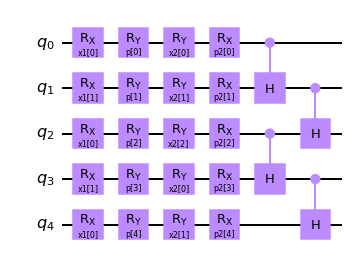

In [2]:
# Constructed simple layered feature map with four variable groups

x_var = VariableGroup("x1",size=2)
p_var = VariableGroup("p")
x_var2 = VariableGroup("x2",size = 3)
p_var2 = VariableGroup("p2")
layered_pqc = LayeredPQC(num_qubits = 5, variable_groups = (x_var,p_var,x_var2,p_var2))
layered_pqc.Rx(x_var)
layered_pqc.Ry(p_var)
layered_pqc.Ry(x_var2)
layered_pqc.Rx(p_var2)
layered_pqc.ch_entangling()

# Draw PQC
x1 = ParameterVector("x1", layered_pqc.get_number_of_variables(x_var))
x2 = ParameterVector("x2", layered_pqc.get_number_of_variables(x_var2))
p = ParameterVector("p", layered_pqc.get_number_of_variables(p_var))
p2 = ParameterVector("p2", layered_pqc.get_number_of_variables(p_var2))
layered_pqc.get_circuit(x1,p,x2,p2).draw()


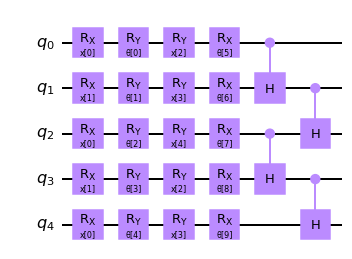

In [3]:
# Convert layered PQC to the sQUlearn feature map by to_feature_map
# variable groups of the features and parameters are specified as lists
fmm = layered_pqc.to_feature_map([x_var,x_var2],[p_var,p_var2])
fmm.draw()

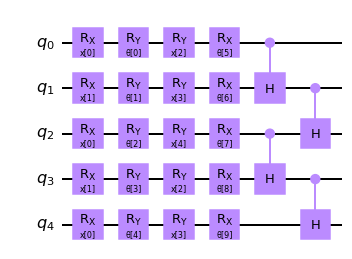

In [4]:
# Convert layered PQC to the sQUlearn by the ConvertedLayeredFeatureMap class
# variable groups of the features and parameters are specified as lists
fm2 = ConvertedLayeredFeatureMap(layered_pqc,[x_var,x_var2],[p_var,p_var2])
fm2.draw()